In [1]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np

# 假設每行是 [血壓, 血糖, 年齡]，標籤是 0 = 健康, 1 = 生病
medicine_data = np.array([[120, 85, 25], [140, 90, 35], [110, 70, 22], [150, 95, 40], [130, 88, 29],
              [160, 100, 50], [125, 80, 27], [135, 92, 33]])
medicine_label = np.array([0, 1, 0, 1, 0, 1, 0, 1])

# 切分訓練與測試資料
train_data, test_data, train_label, test_label = train_test_split(medicine_data, medicine_label, test_size = 0.3, random_state = 42)

# 建立分類器
clf = tree.DecisionTreeClassifier()
medicine_clf = clf.fit(train_data, train_label)

print("訓練資料正確率:", clf.score(train_data, train_label))
print("測試資料正確率:", clf.score(test_data, test_label))
predict = clf.predict(test_data)
print("標準答案:", test_label)
print("預測答案:", predict)

訓練資料正確率: 1.0
測試資料正確率: 0.6666666666666666
標準答案: [1 1 0]
預測答案: [0 1 0]


In [2]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file = None)
graph = graphviz.Source(dot_data)
graph.render("medicine")  # 將結果存成pdf檔案

'medicine.pdf'

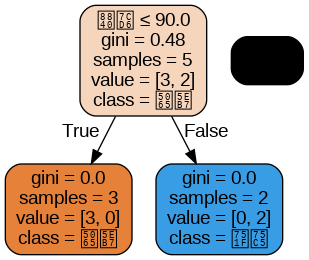

In [3]:
import pydotplus
from IPython.display import Image
from sklearn import tree

# 定義特徵名稱和類別名稱
feature_names = ["血壓", "血糖", "年齡"]
class_names = ["健康", "生病"]

dot_data = tree.export_graphviz(clf, out_file = None, feature_names = feature_names,
                 class_names = class_names, filled = True, rounded = True,
                 special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())  # 將結果用圖形化呈現